# **Task 2: Predicting customer buying behaviour**

## **Understand The Data :**






- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking




## **EDA**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/praveendecode/Datasets/main/customer_booking.csv',encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


**Categorcal Distribution**

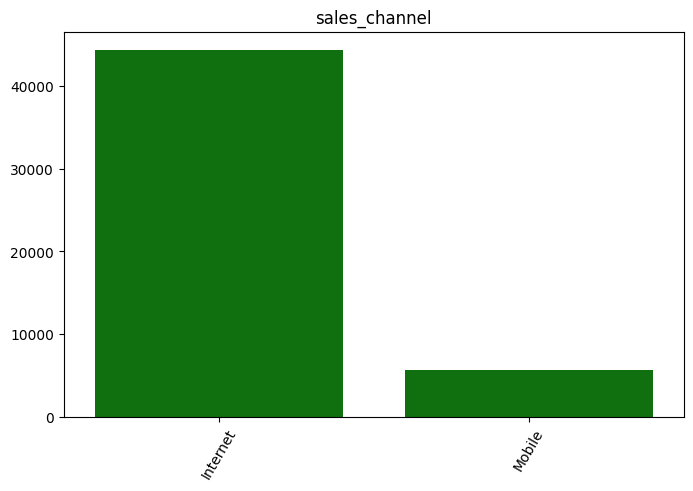

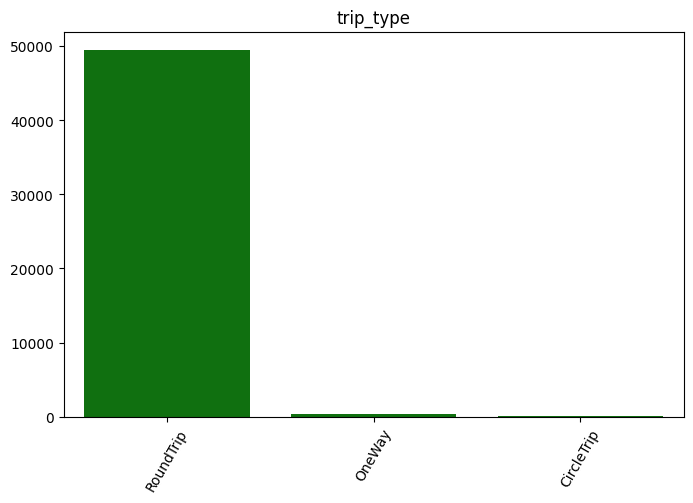

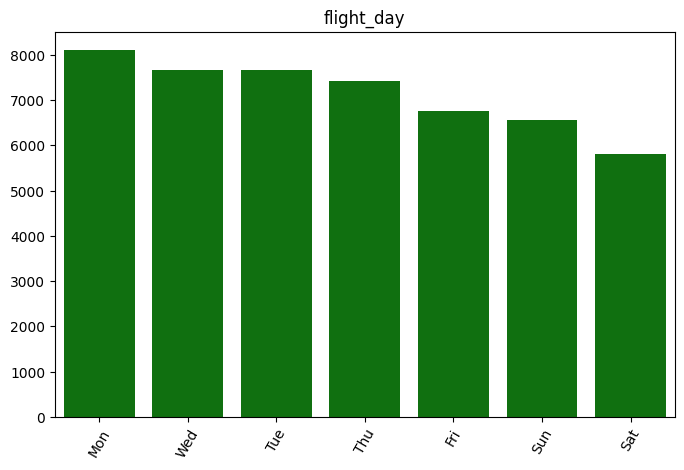

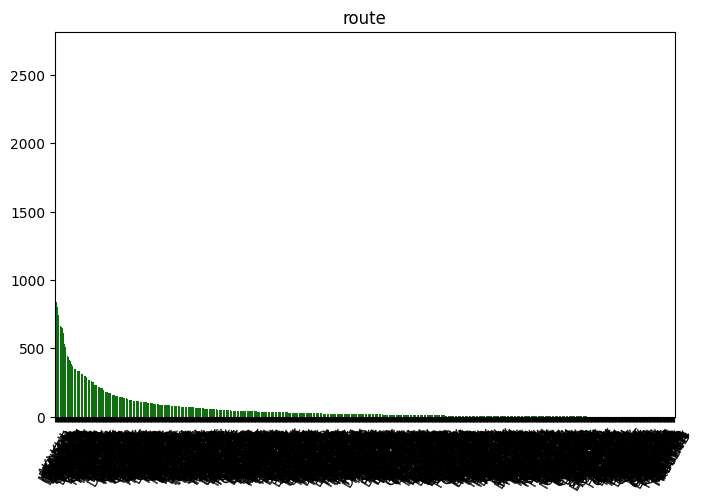

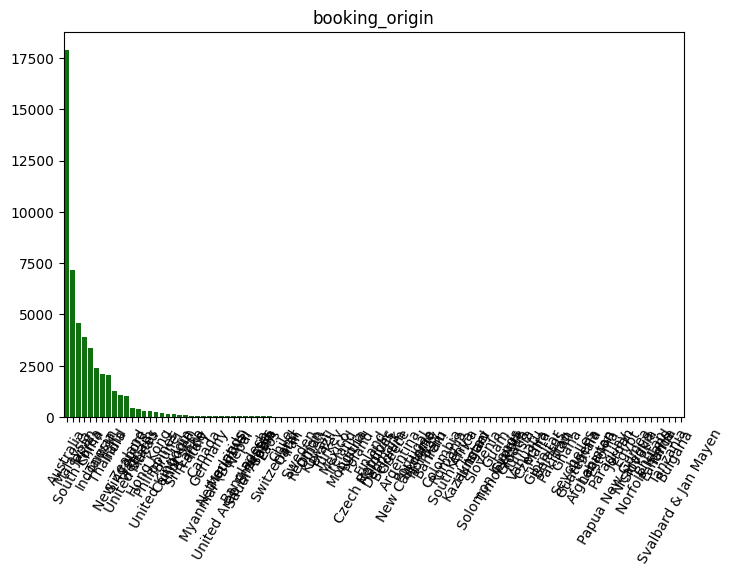

In [ ]:
def cat_unique_dist(columns):
    for i in columns:
      names = df[i].value_counts().index.tolist()
      values = df[i].value_counts().values.tolist()
      plt.figure(figsize=(8,5))
      sns.barplot(x=names,y=values,color='g').set(title=f'{i}')
      plt.xticks(rotation=60)
      plt.show()
      print()



cat_unique_dist(df.select_dtypes(include=['object']))

**Continous Distribution**

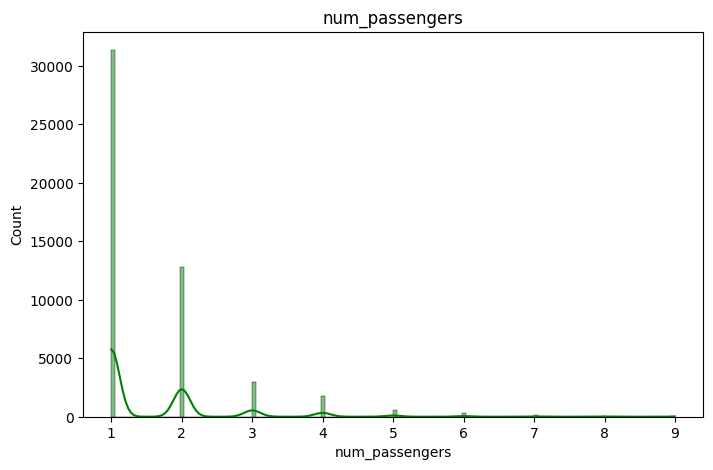

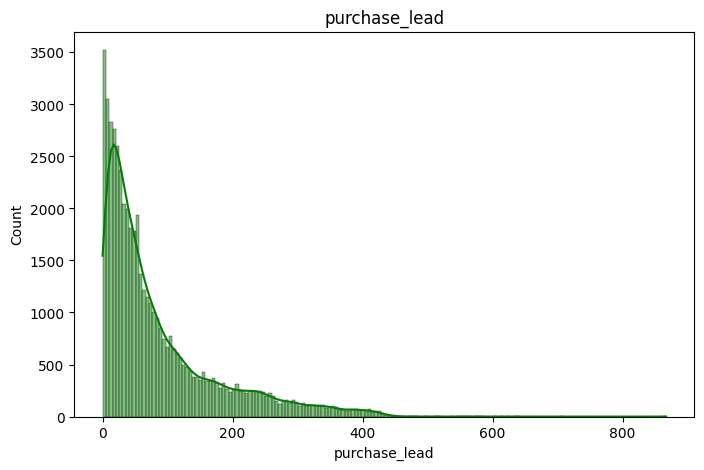

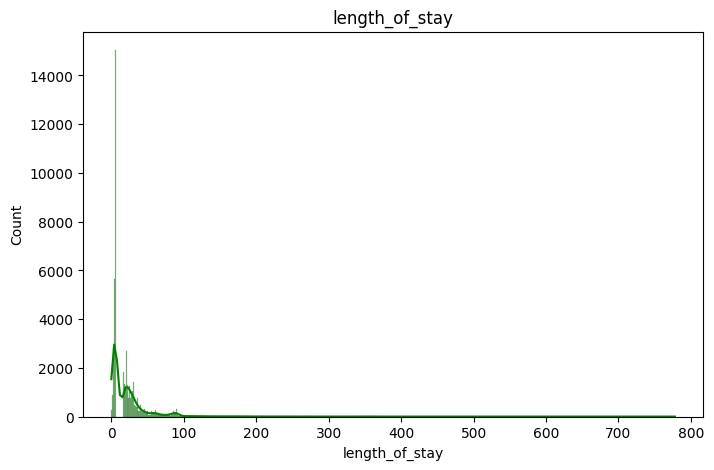

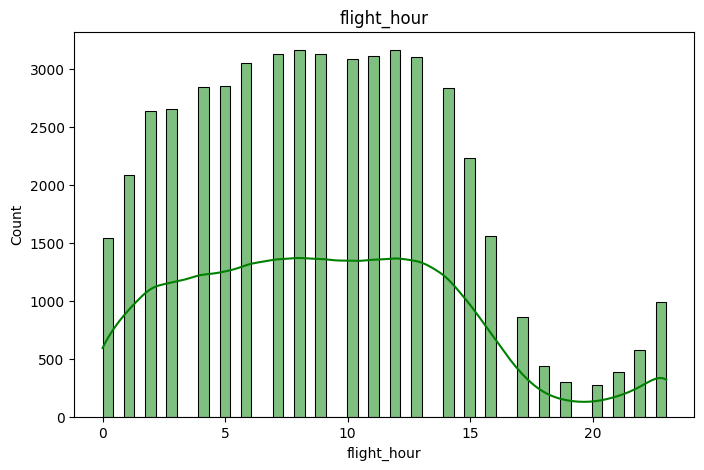

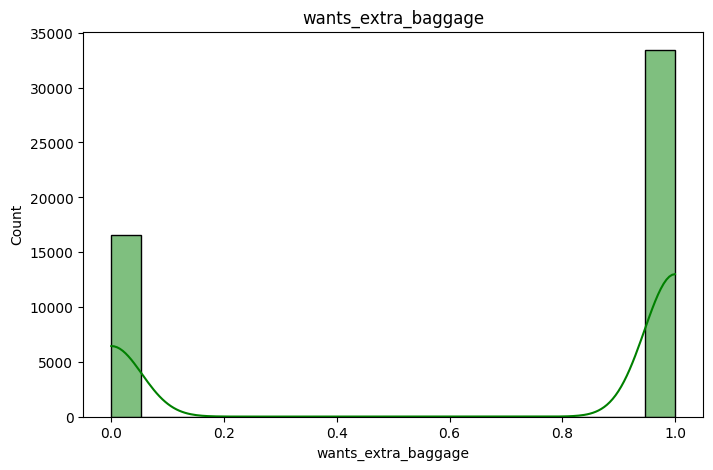

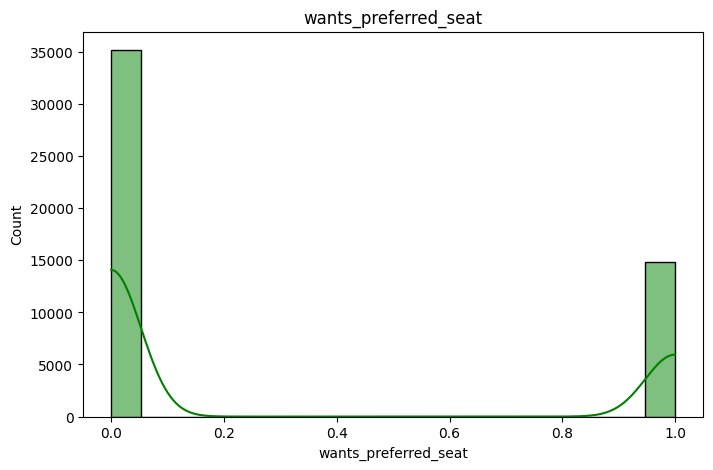

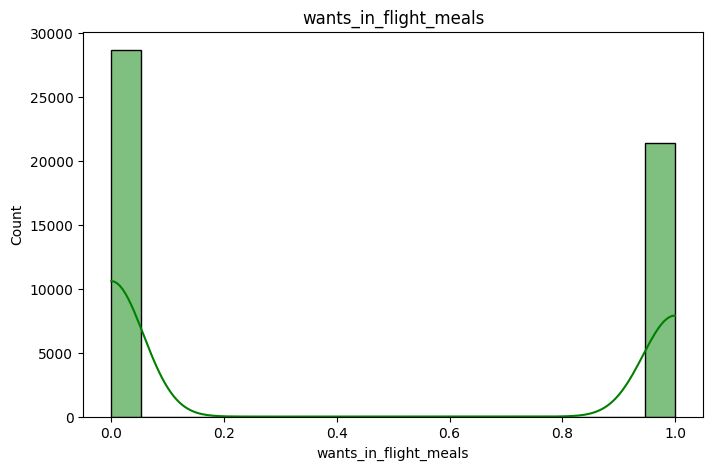

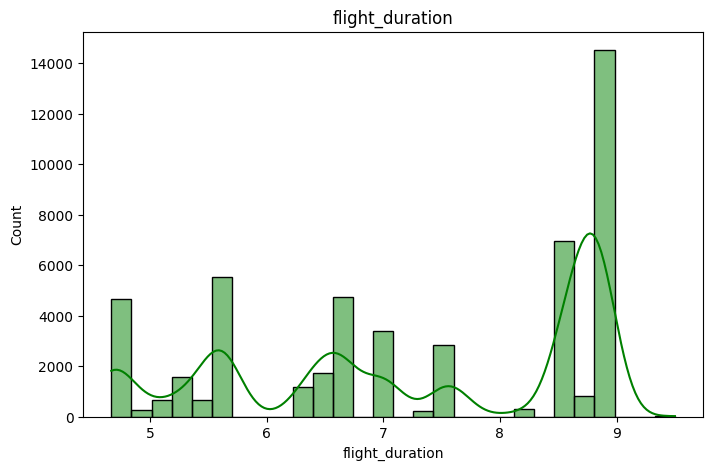

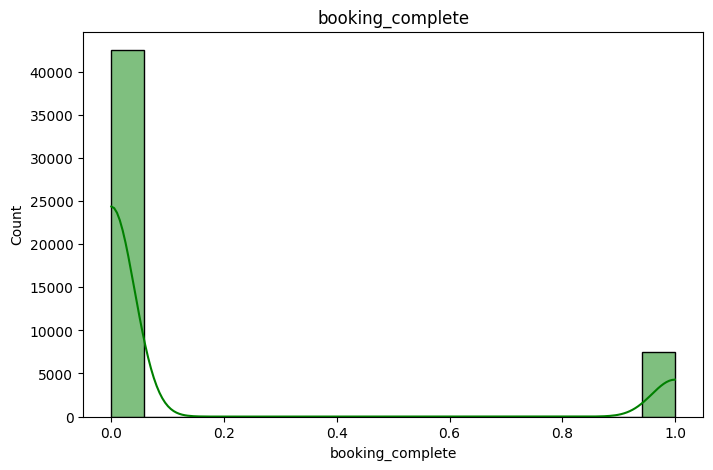

In [ ]:
def con_dist(columns):
    for i in columns:
      plt.figure(figsize=(8,5))
      sns.histplot(data=df,x=i,color='g',kde=True).set(title=f'{i}')
      plt.show()
      print()



con_dist(df.select_dtypes(include=['number']))

## **Model Process**

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler

In [ ]:
encoder = OrdinalEncoder()

scaler  = StandardScaler()

In [ ]:
def cat_unique_dist(columns):
    for i in columns:

      df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

cat_unique_dist(df.select_dtypes(include=['object']))

In [ ]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [ ]:
x = df.drop('booking_complete',axis=1)

y = df['booking_complete']

In [ ]:
def model_use():

  train_accuracy = []
  test_accuracy  = []

  k = int(input('Enter the value for cross verification : '))

  split = float(input('Enter the vakue for split : '))

  for i in range(k):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=split)

    # Scaling

    xtrain = scaler.fit_transform(xtrain)

    xtrain = pd.DataFrame(xtrain,columns=x.columns)

    xtest  = scaler.fit_transform(xtest)

    xtest  = pd.DataFrame(xtest,columns=x.columns)


    model =  RandomForestClassifier().fit(xtrain,ytrain)

    # Prediction

    train_predict = model.predict(xtrain)

    test_predict  = model.predict(xtest)

    # Accuracy

    train_acc = accuracy_score(ytrain,train_predict)
    test_acc = accuracy_score(ytest,test_predict)

    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

    print(f'Fold {i+1} : Training Accuracy: {train_acc} , Testing Accuracy : {test_acc}')

  print(f"Mean Training Accuracy : {sum(train_accuracy)/len(train_accuracy)}  Mean Testing Accuracy : {sum(test_accuracy)/len(test_accuracy)}")

  return model


In [ ]:
model = model_use()

Enter the value for cross verification : 5
Enter the vakue for split : .2
Fold 1 : Training Accuracy: 0.999875 , Testing Accuracy : 0.8521
Fold 2 : Training Accuracy: 0.9998 , Testing Accuracy : 0.8493
Fold 3 : Training Accuracy: 0.99985 , Testing Accuracy : 0.8527
Fold 4 : Training Accuracy: 0.999825 , Testing Accuracy : 0.8521
Fold 5 : Training Accuracy: 0.9998 , Testing Accuracy : 0.8481
Mean Training Accuracy : 0.99983  Mean Testing Accuracy : 0.85086


## **Feature Importance**

In [ ]:
import numpy as np

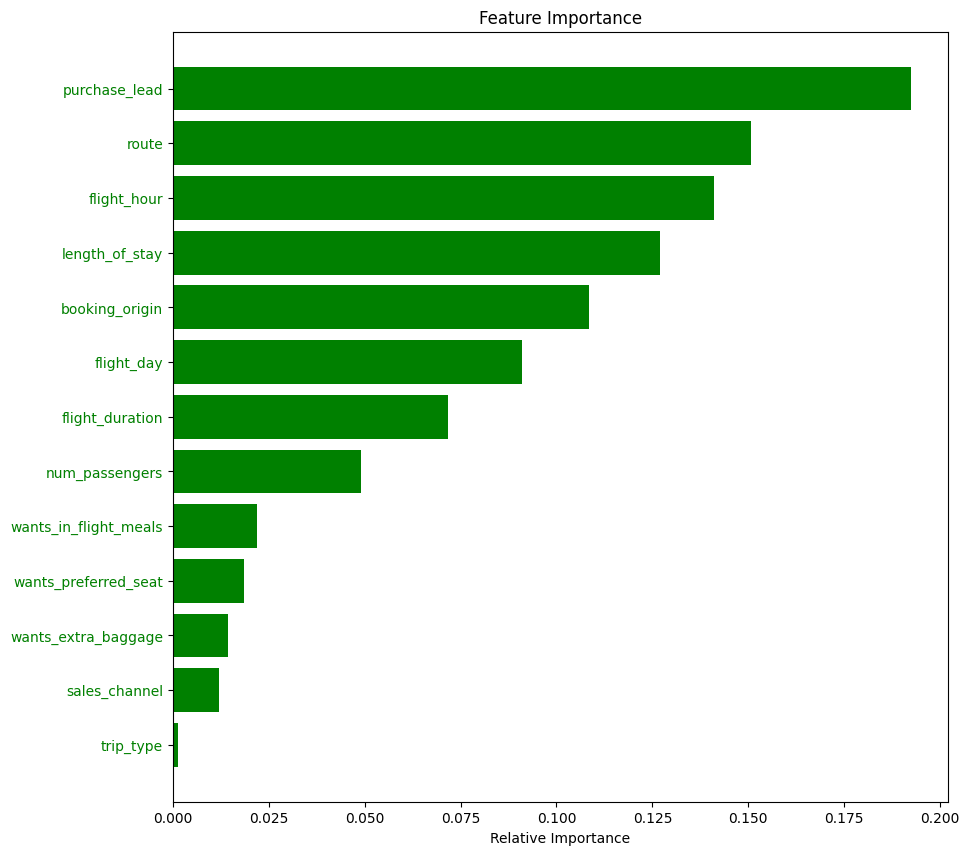

In [ ]:
importance = model.feature_importances_

features = [i for i in x.columns]

indices  = np.argsort(importance)
fig , ax = plt.subplots(figsize=(10,10))

plt.barh(range(len(indices)),importance[indices],color='g')

plt.yticks(range(len(indices)),[features[i] for i in indices],color='g')

plt.title('Feature Importance')

plt.xlabel('Relative Importance')

plt.show()